# A walk with Deep Learning

## Let's work with CNNs in the CIFAR10 dataset

In this Jupypter notebook, we will implement....

In [ ]:
import tensorflow as tf
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


## We're going to use the CIFAR 10 from Keras

32x32 images with 3 channels of 10 categories
<div>
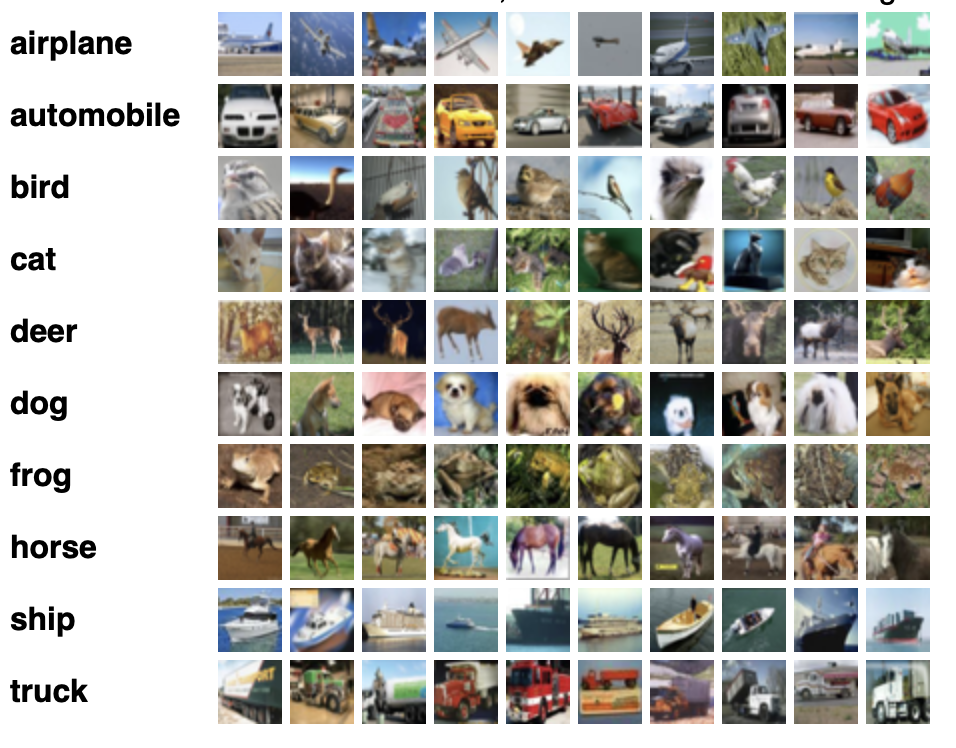
</div>


In [ ]:
print(f"Train shape {X_train.shape}. Test shape {X_test.shape}.")

In [ ]:
plt.figure(figsize = (2,2))
plt.imshow(X_train[1])

In [ ]:
# CNN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten


#create model
model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

## Let's train and compile our CNN model

We use the Adam optimizer, a categorical crossentropy loss function and the accuracy metric for evaluation. 
Other metrics such as tf.keras.metrics.Precision() or tf.keras.metrics.Recall() are also availabe in Keras

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=10)


In [ ]:
# Generating predictions
model.predict(X_test[:2]).argmax(axis=-1)
